In [1]:
#importar el idioma
import spacy
nlp = spacy.load("en_core_web_sm")


In [2]:
text_sentence_1="This is a class about text processing"

In [4]:
#para pasar la sentence a doc
doc1=nlp(text_sentence_1)
type(doc1)

spacy.tokens.doc.Doc

What is a Doc? It is a sequence of Token objects. Access sentences and named entities, export annotations to numpy arrays, losslessly serialize to compressed binary strings.

And what is a Token? It is a word, punctuation symbol, whitespace, etcetera.


In [5]:
# Let's tokenize th sentence
for token in doc1:
    print(token)

This
is
a
class
about
text
processing


In [6]:
doc1[0]

This

In [7]:
doc1[-1]

processing

#### Linguistic features/annotation
spaCy does not only have a record the position as if we will be splitting the sentence. spaCy records the grammatical structure of the sentence. 

So after tokenization (splitting the sentence into the individual components), spaCy can do **Part-of-speech** (POS) tagging. This is done by using spaCy's statistical models to make predictions of what each token is. For instance, a word following "the" in the English is most likely a noun. And that's why we need language models.

---

We have the following features that we can get per token:

*   **Text**: The original word text.
*   **Lemma**: The base form of the word.
*   **POS**: The simple part-of-speech tag.
*   **Tag**: The detailed part-of-speech tag.
*   **Dep**: Syntactic dependency, i.e. the relation between tokens.
*   **Shape**: The word shape – capitalization, punctuation, digits.
*   **is alpha**: Is the token an alpha character?
*   **is stop**: Is the token part of a stop list, i.e. the most common words of the language?



In [9]:
text_sentence_2 = "The coffee this morning costed me $4, that is extremely expensive!"
doc2 = nlp(text_sentence_2)

for token in doc2:
    print(token.text, token.pos_, token.dep_)

The DET det
coffee NOUN nsubj
this DET det
morning NOUN npadvmod
costed VERB ccomp
me PRON dative
$ SYM nmod
4 NUM dobj
, PUNCT punct
that PRON nsubj
is AUX ROOT
extremely ADV advmod
expensive ADJ acomp
! PUNCT punct


In [10]:
# We can build a Pandas Dataframe with the contents of a token/doc loop, just for nice visualization
import pandas as pd

d = []
for token in doc2:
    d.append({'TEXT': token.text, 'LEMMA': token.lemma_, 
              'POS': token.pos_, 'TAG': token.tag_,
              'DEP': token.dep_, 'SHAPE': token.shape_,
              'ALPHA': token.is_alpha, 'STOP': token.is_stop})

spacy_dataframe = pd.DataFrame(d)
spacy_dataframe

,TEXT,LEMMA,POS,TAG,DEP,SHAPE,ALPHA,STOP
0,The,the,DET,DT,det,Xxx,True,True
1,coffee,coffee,NOUN,NN,nsubj,xxxx,True,False
2,this,this,DET,DT,det,xxxx,True,True
3,morning,morning,NOUN,NN,npadvmod,xxxx,True,False
4,costed,cost,VERB,VBD,ccomp,xxxx,True,False
5,me,-PRON-,PRON,PRP,dative,xx,True,True
6,$,$,SYM,$,nmod,$,False,False
7,4,4,NUM,CD,dobj,d,False,False
8,",",",",PUNCT,",",punct,",",False,False
9,that,that,PRON,WDT,nsubj,xxxx,True,True


In [12]:
spacy.explain('VBZ')  #por si no sabes que es

'verb, 3rd person singular present'

In [13]:
spacy.explain('PUNCT')

'punctuation'

In [14]:
import spacy
from spacy import displacy

# Show POS and synthatic dependencies
displacy.render(doc2, style="dep", jupyter=True, options={'distance': 100})

In [15]:
# The entity visualizer highlights named entities and their labels in the text
displacy.render(doc2, style="ent", jupyter=True, options={'distance': 100})

Tokenization rules

The tokenization applies rules specific to each language. For instance, punctuation at the end of a sentence should be split off – whereas “U.K.” should remain one token. Also don't should be split as do and not and such.

Those form part of the tokenizer exceptions, that make all that decisions for each language model on whether to split a word or not.

    Tokenizer exception: Special-case rule to split a string into several tokens or prevent a token from being split when punctuation rules are applied.
    Prefix: Character(s) at the beginning, e.g. $, (, “, ¿.
    Suffix: Character(s) at the end, e.g. km, ), ”, !.
    Infix: Character(s) in between, e.g. -, --, /, ….

If we want to change the tokenization or add some, we will need to create our own rules (rarely used unless you are dealing with scientific/slang languages).


In [16]:
text_sentence_3="I was accepted at UCL-CV Master in U.K., but I didn't have enough money for it!"

In [17]:
"""
With Python we can also split the text using .split().

The problem is that we do not retain contextual token information.
Such as do/not or punctuations such as commas or exclamations.
"""

text_sentence_3.split(' ')

['I',
 'was',
 'accepted',
 'at',
 'UCL-CV',
 'Master',
 'in',
 'U.K.,',
 'but',
 'I',
 "didn't",
 'have',
 'enough',
 'money',
 'for',
 'it!']

In [18]:
doc3=nlp(text_sentence_3)

for token in doc3:
    print(token.text)

I
was
accepted
at
UCL
-
CV
Master
in
U.K.
,
but
I
did
n't
have
enough
money
for
it
!


##### Creating our own rule

Global and language-specific tokenizer data is supplied via the language data in spacy/lang. The tokenizer exceptions define special cases like “don’t” in English, which needs to be split into two tokens: {ORTH: "do"} and {ORTH: "n't", NORM: "not"}. The prefixes, suffixes and infixes mostly define punctuation rules – for example, when to split off periods (at the end of a sentence), and when to leave tokens containing periods intact (abbreviations like “U.S.”).

![alt text](https://spacy.io/language_data-ef63e6a58b7ec47c073fb59857a76e5f.svg)

Anything that’s specific to a domain or text type – like financial trading abbreviations, or Bavarian youth slang – should be added as a special case rule to your tokenizer instance. If you’re dealing with a lot of customizations, it might make sense to create an entirely custom subclass.

In [20]:
text_sentence_4="Hey, gimme your money"

doc4=nlp(text_sentence_4)

for token in doc4:
    print(token.text)

Hey
,
gimme
your
money


In [22]:
import spacy
from spacy.symbols import ORTH

npl=spacy.load("en_core_web_sm")

doc4=nlp(text_sentence_4)

special_case=[{ORTH:"gim"},{ORTH:'me'}] #como separar en dos palabras
nlp.tokenizer.add_special_case("gimme",special_case)

In [24]:
doc4=nlp(text_sentence_4)
for token in doc4:
    print(token.text)

Hey
,
gim
me
your
money


In [25]:
text_sentence_5 = 'Some\nspaces  and\ttab characters' #el token no cuenta los espacios pero si hay un \n lo cuenta como espacio. sirve para contar parrafos x ejermplo.

doc5 = nlp(text_sentence_5)

for token in doc5:
    print(token.text)

#token no cuenta los espacios pero si \n o \t - -sirve para contar parrafos por ejemplo

Some


spaces
 
and
	
tab
characters


In [29]:
doc5[1].is_space


True

In [30]:
text_sentence_6 = "In ancient Rome, some neighbors live in three adjacent houses. In the center is the house of Senex, who lives there with wife Domina, son Hero, and several slaves, including head slave Hysterium and the musical's main character Pseudolus. A slave belonging to Hero, Pseudolus wishes to buy, win, or steal his freedom. One of the neighboring houses is owned by Marcus Lycus, who is a buyer and seller of beautiful women; the other belongs to the ancient Erronius, who is abroad searching for his long-lost children (stolen in infancy by pirates). One day, Senex and Domina go on a trip and leave Pseudolus in charge of Hero. Hero confides in Pseudolus that he is in love with the lovely Philia, one of the courtesans in the House of Lycus (albeit still a virgin)."

doc6 = nlp(text_sentence_6)

for sent in doc6.sents: # se puede acceder por sentences
    print(sent)

In ancient Rome, some neighbors live in three adjacent houses.
In the center is the house of Senex, who lives there with wife Domina, son Hero, and several slaves, including head slave Hysterium and the musical's main character Pseudolus.
A slave belonging to Hero, Pseudolus wishes to buy, win, or steal his freedom.
One of the neighboring houses is owned by Marcus Lycus, who is a buyer and seller of beautiful women; the other belongs to the ancient Erronius, who is abroad searching for his long-lost children (stolen in infancy by pirates).
One day, Senex and Domina go on a trip and leave Pseudolus in charge of Hero.
Hero confides in Pseudolus that he is in love with the lovely Philia, one of the courtesans in the House of Lycus (albeit still a virgin).


# Lemmatization

Lemmatization is the assignation of the base forms of words. For example, the lemma of “was” is “be”, and the lemma of “rats” is “rat”.

In [31]:
nlp('they are neighbours')[-1].lemma_

'neighbour'

In [32]:
doc6[0]

In

In [33]:
doc6[0].lemma_

'in'

#### Dealing with STOP words
In computing, stop words are words which are filtered out before processing of natural language data (text). Stop words are generally the most common words in a language; there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list. Some tools avoid removing stop words to support phrase search.


In [39]:
from spacy.lang.en.stop_words import STOP_WORDS

print(STOP_WORDS)

{'has', 'make', 'yourselves', 'go', 'all', 'am', 'above', 'can', 'otherwise', "'re", 'should', 'well', 'really', 'nothing', 'give', 'or', 'become', 'quite', 'call', 'serious', 'empty', 'full', 'after', 'front', 'namely', 'never', 'under', '’ll', '‘m', 'moreover', 'around', 'up', 'which', 'also', 'few', 'four', 'except', 'once', 'since', 'afterwards', 'ever', 'along', 'mine', 'move', 'n‘t', 'regarding', 'else', 'off', 'are', 'noone', 'because', 'part', 'our', 'twelve', 'side', 'whereafter', 'enough', 'much', 'while', 'themselves', 'you', 'the', 'third', 'seem', 'keep', '‘re', 'either', 'fifty', 'own', 'latter', 'even', 'everything', 'using', 'several', 'were', 'had', 'have', 'however', 'beside', 'we', 'that', 'out', 'him', 'thence', 'whence', 'its', 'who', 'ten', 'my', 'various', 'thus', 'thereby', 'anywhere', 'between', 'although', 'alone', 'down', 'get', "'m", 'became', 'been', 'an', 'did', 'neither', 'sometimes', "'s", 'from', 'over', 'whole', 'due', 'ourselves', 'across', 'in', 'any

In [40]:
doc6[0] in STOP_WORDS

False

In [41]:
doc6[0].is_stop

True

## Entity recognition

A **named entity** is a *real-world object* that’s assigned a name – for example, a person, a country, a product or a book title.

spaCy can recognize [many types of named entities](https://spacy.io/api/annotation#named-entities), by predicting over a language model. Results are not 100% accurate as models are statistical and depends on the examples they are trained on, but this can be fine tuned for you later on.

Named entities can be accessed from the *ents* properties of a spaCy *Doc*:

In [42]:
text_sentence_7 = u'Apple is looking at buying U.K. startup for 1 billion USD'
doc7 = nlp(text_sentence_7)

There are certain entity properties that can be accessed:

* **Text**: The original entity text.
* **Start**: Index of start of entity in the Doc.
* **End**: Index of end of entity in the Doc.
* **Label**: Entity label, i.e. type.

In [43]:
for ent in doc7.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
1 billion 44 53 CARDINAL


In [44]:
displacy.render(doc7,style="ent",jupyter=True)

In [45]:
displacy.render(doc6, style="ent", jupyter=True)

# words vectors and similarity

In [46]:
!python -m spacy download en_core_web_md

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


The word vectors can be explored with the following techniques then:

* **Text**: The original token text.
* **has vector**: Does the token have a vector representation?
* **Vector norm**: The L2 norm of the token’s vector (the square root of the sum of the values squared)
* **OOV**: Out-of-vocabulary

The words “dog”, “cat” and “banana” are all pretty common in English, so they’re part of the model’s vocabulary, and come with a vector. The word “afskfsd” on the other hand is a lot less common and out-of-vocabulary – so its vector representation consists of 300 dimensions of 0, which means it’s practically nonexistent.

spaCy is able to compare two objects, and make a prediction of how similar they are. Predicting similarity is useful for building recommendation systems or flagging duplicates. For example, you can suggest a user content that’s similar to what they’re currently looking at, or label a support ticket as a duplicate if it’s very similar to an already existing one.

Each Doc, Span and Token comes with a .similarity() method that lets you compare it with another object, and determine the similarity. Of course similarity is always subjective – whether “dog” and “cat” are similar really depends on how you’re looking at it. spaCy’s similarity model usually assumes a pretty general-purpose definition of similarity.


In [48]:
import spacy

nlp=spacy.load("en_core_web_md")
tokens=nlp("dog cat banana skjdkajsh")

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 7.0336733 False
cat True 6.6808186 False
banana True 6.700014 False
skjdkajsh False 0.0 True


In [50]:
tokens=nlp("dog cat banana")

for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

dog dog 1.0
dog cat 0.80168545
dog banana 0.24327643
cat dog 0.80168545
cat cat 1.0
cat banana 0.28154364
banana dog 0.24327643
banana cat 0.28154364
banana banana 1.0


## The Vocab object

* **Token**: A word, punctuation mark etc. in context, including its attributes, tags and dependencies.
* **Lexeme**: A “word type” with no context. Includes the word shape and flags, e.g. if it’s lowercase, a digit or punctuation.
* **Doc**: A processed container of tokens in context.
* **Vocab**: The collection of lexemes.
* **StringStore**: The dictionary mapping hash values to strings, for example 3197928453018144401 → “coffee”.


![alt text](https://spacy.io/vocab_stringstore-1d1c9ccd7a1cf4d168bfe4ca791e6eed.svg)


In [52]:
nlp.vocab["Apple"]

In [54]:
lex=doc7.vocab['million']
lex

In [58]:
lex.shape_

'xxxx'

In [60]:
lex.text

'million'

In [63]:
lex.is_alpha

True

## Word frequency

We can compute the word frequency on a text using spaCy. Within the Holy Grail dataset, lets:



*   Let's find the 5 most common nouns
*   Let's find the 20 most common lemmas that are not stopwords



In [66]:
!wget 'https://raw.githubusercontent.com/vfp1/bts-mbds-data-science-foundations-2019/master/sessions/data/holy_grail.txt'

--2019-11-06 17:30:01--  https://raw.githubusercontent.com/vfp1/bts-mbds-data-science-foundations-2019/master/sessions/data/holy_grail.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.128.133, 151.101.64.133, 151.101.0.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.128.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65003 (63K) [text/plain]
Saving to: ‘holy_grail.txt’

holy_grail.txt      100%[===================>]  63,48K  --.-KB/s    in 0,03s   

2019-11-06 17:30:02 (1,83 MB/s) - ‘holy_grail.txt’ saved [65003/65003]



In [84]:
import spacy

nlp = spacy.load("en")

holy_grail = nlp(open('holy_grail.txt', 'r').read())#abrir y leerlo

In [100]:
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

char_counter=Counter()

for token in holy_grail:
    if token.pos_=='PROPN' and token.text not in STOP_WORDS and token.text !='#':
        char_counter[token.text] += 1

In [101]:
char_counter.most_common(5)

[('ARTHUR', 225),
 ('LAUNCELOT', 76),
 ('KNIGHT', 66),
 ('GALAHAD', 64),
 ('FATHER', 62)]

In [102]:
lemmas=Counter()

for token in holy_grail:
    if not token.is_punct and not token.is_space and token.lower_ not in STOP_WORDS:
        lemmas[token.lemma_] +=1

In [103]:
counts=Counter(lemmas)
counts.most_common(20)

[('ARTHUR', 225),
 ('oh', 110),
 ('1', 76),
 ('LAUNCELOT', 76),
 ('KNIGHT', 66),
 ('GALAHAD', 64),
 ('FATHER', 62),
 ('ha', 59),
 ('BEDEVERE', 58),
 ('right', 55),
 ('HEAD', 54),
 ('yes', 53),
 ('Sir', 52),
 ('come', 46),
 ('Ni', 46),
 ('boom', 45),
 ('2', 42),
 ('witch', 41),
 ('clop', 39),
 ('burn', 39)]

## Dispersion plots


In [132]:
from spacy import load

nlp=load('en')

holy_grial=nlp(open('holy_grail.txt','r').read())

In [133]:
from collections import Counter

char_counter=Counter()

for token in holy_grail:
    if token.pos_=="PROPN":
        char_counter[token.text]+=1

In [134]:
char_counter.most_common(5)

[('ARTHUR', 225),
 ('LAUNCELOT', 76),
 ('KNIGHT', 66),
 ('GALAHAD', 64),
 ('FATHER', 62)]

In [135]:
names,_=zip(*char_counter.most_common(5))
names

('ARTHUR', 'LAUNCELOT', 'KNIGHT', 'GALAHAD', 'FATHER')

In [136]:
from collections import defaultdict
import matplotlib.pyplot as plt

indexes=defaultdict(list)

for token in holy_grail:
    if token.text in names:
        indexes[token.text].append(token.i)

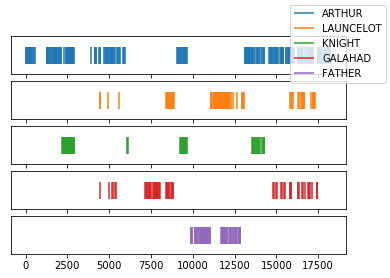

In [147]:
fig, axes = plt.subplots(5, sharex=True)

for ii, name in enumerate(names):
    axes[ii].eventplot(indexes[name], label=name, color="C{}".format(ii))
    axes[ii].get_yaxis().set_visible(False)
fig.legend()

# CLASS 9

In [2]:
import spacy
nlp=spacy.load('en')

In [3]:
holy_grail=nlp(open('holy_grail.txt','r').read())

In [4]:
#5most common nouns
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

char_counter=Counter()

for token in holy_grail:
    if token.pos_=="NOUN" and token.text not in STOP_WORDS and token.text!="#":
        char_counter[token.text]+=1


In [5]:
char_counter.most_common(5)

[('boom', 42), ('witch', 37), ('music', 29), ('clop', 26), ('singing', 26)]

In [15]:
#20 most common lemmas (that are not stop words)

#5most common nouns
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

lemmas=Counter()

for token in holy_grail:
    if token.pos_!="PROPN" and not token.is_punct and not token.is_space and not token.is_digit and token.lower_ not in STOP_WORDS:
        lemmas[token.text]+=1

In [16]:
lemmas.most_common(20)

[('Oh', 109),
 ('Yes', 42),
 ('boom', 42),
 ('ha', 42),
 ('clop', 39),
 ('away', 37),
 ('witch', 37),
 ('Burn', 32),
 ('singing', 31),
 ('music', 29),
 ('squeak', 28),
 ('got', 27),
 ('Right', 27),
 ('Come', 26),
 ('Hello', 26),
 ('tell', 24),
 ('Look', 24),
 ('dead', 22),
 ('going', 22),
 ('right', 21)]

In [19]:
#10 MOST COMMON NAMES

char_counter=Counter()

for token in holy_grail:
    if token.pos_ =='PROPN':
        char_counter[token.text]+=1

char_counter.most_common(10)

[('ARTHUR', 225),
 ('LAUNCELOT', 76),
 ('KNIGHT', 66),
 ('GALAHAD', 64),
 ('FATHER', 62),
 ('BEDEVERE', 58),
 ('HEAD', 54),
 ('Sir', 52),
 ('Ni', 46),
 ('ROBIN', 38)]

In [23]:
#Sir is not a character, so:

from spacy.symbols import ORTH, POS, NOUN, VERB, TAG

nlp_modified=spacy.load('en')
nlp_modified.tokenizer.add_special_case('Sir',[{ORTH:'Sir',POS:NOUN,TAG:NOUN}])


In [25]:
holy_grail2=nlp_modified(open('holy_grail.txt','r').read())


In [28]:
char_counter2=Counter()
for token in holy_grail2:
    if token.pos_=='PROPN':
        char_counter2[token.text] +=1
char_counter2.most_common(10)

[('ARTHUR', 225),
 ('LAUNCELOT', 76),
 ('KNIGHT', 66),
 ('GALAHAD', 64),
 ('FATHER', 62),
 ('BEDEVERE', 58),
 ('HEAD', 54),
 ('Ni', 46),
 ('ROBIN', 38),
 ('KNIGHTS', 37)]

In [70]:
#visualizing

char_counter2.most_common(1)
names, _ =zip(*char_counter.most_common(1))


In [71]:
from collections import defaultdict
import matplotlib.pyplot as plt

indexes=defaultdict(list)

for token in holy_grail2:
    if token.text in names:
        indexes[token.text].append(token.i)


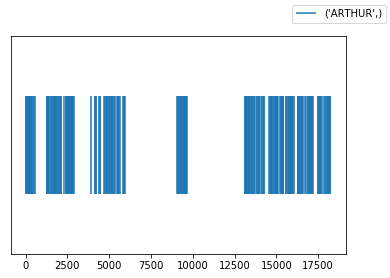

In [73]:
fig, axes=plt.subplots()

axes.eventplot(indexes['ARTHUR'], label=names)
axes.get_yaxis().set_visible(False)

fig.legend()

In [76]:
#VISUALIZE MORE THAN ONE

names, _ =zip(*char_counter2.most_common(5))

In [77]:
print(names,_)

('ARTHUR', 'LAUNCELOT', 'KNIGHT', 'GALAHAD', 'FATHER') (225, 76, 66, 64, 62)


In [79]:
from collections import defaultdict
import matplotlib.pyplot as plt

indexes=defaultdict(list)

for token in holy_grail2:
    if token.text in names:
        indexes[token.text].append(token.i)

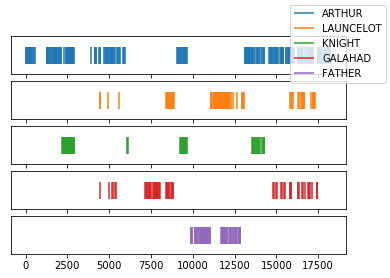

In [84]:
fig, axes = plt.subplots(5, sharex=True)

for index, name in enumerate(names):
    axes[index].eventplot(indexes[name], label=name, color="C{}".format(index))
    axes[index].get_yaxis().set_visible(False)

fig.legend()

# # Text similarity

## Using PCA

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. 

In [85]:
import numpy as np
import spacy
from sklearn.decomposition import PCA

nlp = spacy.load("en")
animals = "plane dog cat hamster lion tiger elephant cheetah monkey gorilla antelope rabbit mouse rat zoo home pet fluffy wild domesticated"

animal_tokens = nlp(animals)

# Create a vector of tokens with numpy
animal_vectors = np.vstack([word.vector for word in animal_tokens if word.has_vector])

#Run a PCA of 2 components
pca = PCA(n_components=2)
animal_vecs_transformed = pca.fit_transform(animal_vectors)

In [86]:
print(animal_vecs_transformed)

[[ 2.8304355   3.818894  ]
 [-0.9081508  -2.36113   ]
 [-2.9921038  -6.7464747 ]
 [-3.7300808   2.921094  ]
 [-2.9397986   4.614554  ]
 [-8.567785   -0.03441417]
 [-1.8463446  -5.1698656 ]
 [-6.079878    3.6220999 ]
 [-2.5673375  -0.0304437 ]
 [-6.719927    7.282258  ]
 [ 0.5054483  -5.5731196 ]
 [-3.5111918  -4.8807573 ]
 [-2.7992313  10.778592  ]
 [-0.28298783  3.1065476 ]
 [-2.7526243  -4.414376  ]
 [-1.8025216  -6.0210266 ]
 [ 4.7226553  -7.452967  ]
 [ 7.8628106   1.9498671 ]
 [10.796334    2.9491363 ]
 [20.782282    1.6415396 ]]


In [87]:
animal_vecs_transformed = np.c_[animals.split(), animal_vecs_transformed]
#con esto agrego el nomre de del token

In [89]:
print(animal_vecs_transformed)

[['plane' '2.8304355' '3.818894']
 ['dog' '-0.9081508' '-2.36113']
 ['cat' '-2.9921038' '-6.7464747']
 ['hamster' '-3.7300808' '2.921094']
 ['lion' '-2.9397986' '4.614554']
 ['tiger' '-8.567785' '-0.034414172']
 ['elephant' '-1.8463446' '-5.1698656']
 ['cheetah' '-6.079878' '3.6220999']
 ['monkey' '-2.5673375' '-0.030443698']
 ['gorilla' '-6.719927' '7.282258']
 ['antelope' '0.5054483' '-5.5731196']
 ['rabbit' '-3.5111918' '-4.8807573']
 ['mouse' '-2.7992313' '10.778592']
 ['rat' '-0.28298783' '3.1065476']
 ['zoo' '-2.7526243' '-4.414376']
 ['home' '-1.8025216' '-6.0210266']
 ['pet' '4.7226553' '-7.452967']
 ['fluffy' '7.8628106' '1.9498671']
 ['wild' '10.796334' '2.9491363']
 ['domesticated' '20.782282' '1.6415396']]


In [91]:
component_1 = [float(x) for x in animal_vecs_transformed[:, 1]]
component_2 = [float(x) for x in animal_vecs_transformed[:, 2]]

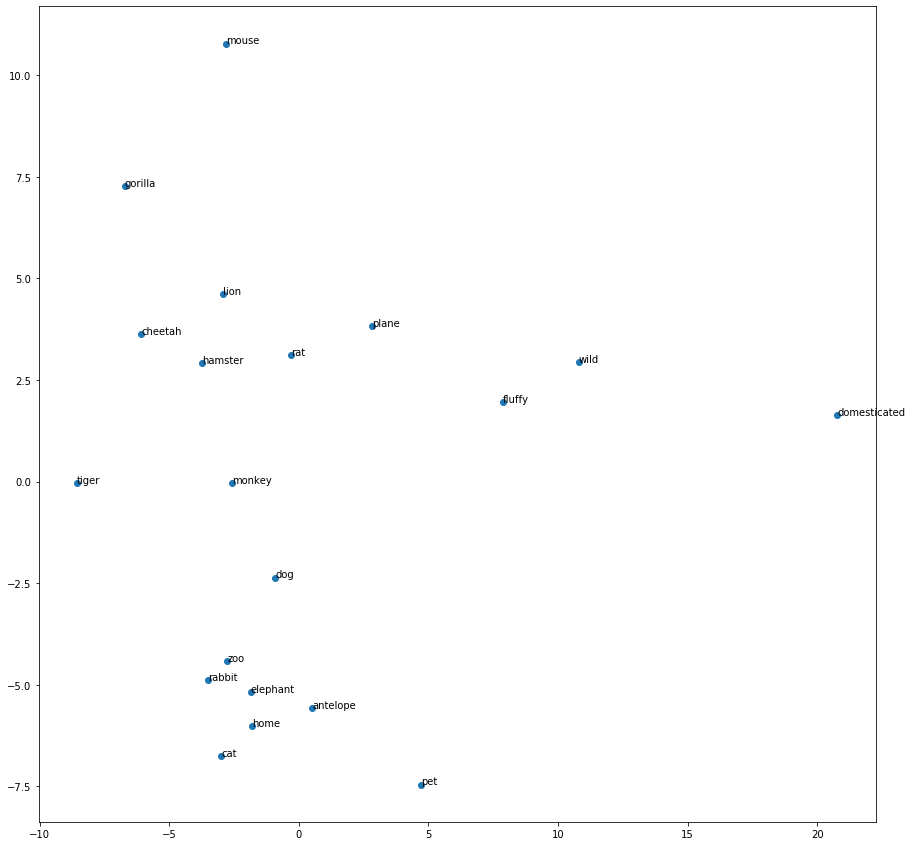

In [92]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(component_1, component_2)

for i, txt in enumerate(animal_vecs_transformed[:, 0]):
    ax.annotate(txt, (component_1[i], component_2[i]))

## Using t-SNE

**t-Distributed Stochastic Neighbor Embedding** (t-SNE) is a (prize-winning) technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. The technique can be implemented via Barnes-Hut approximations, allowing it to be applied on large real-world datasets. 

*Source: Laurens van der Maaten*

Visualizing high-dimensional data by projecting it into a low-dimensional space is a classic operation that anyone working with data has probably done at least once in their life. There are a huge variety of methods for reducing dimensionality, but one very popular method is t-SNE, a method proposed by Geoffry Hinton’s group back in 2008.

### Benefits of t-SNE
* t-SNE, unlike PCA, is not a linear projection. It uses the **local relationships** between points to create a low-dimensional mapping. This allows it to capture **non-linear structure**.
* t-SNE creates a **probability distribution** using the **Gaussian** distribution that defines the relationships between the points in high-dimensional space.
* t-SNE uses the **Student t-distribution** to **recreate** the probability distribution in low-dimensional space. This prevents the **crowding problem**, where points tend to get crowded in low-dimensional space due to the **curse of dimensionality**.
* t-SNE optimizes the embeddings directly using gradient descent. The cost function is non-convex though, meaning there is the risk of getting stuck in local minima. t-SNE uses multiple tricks to try to avoid this problem.

Source: [ML explained](https://mlexplained.com/2018/09/14/paper-dissected-visualizing-data-using-t-sne-explained/)

### 2D

Perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significanlty different results.

In [95]:
import numpy as np
import spacy
from sklearn.manifold import TSNE

nlp = spacy.load("en")
animals = "plane dog cat hamster lion tiger elephant cheetah monkey gorilla antelope rabbit mouse rat zoo home pet fluffy wild domesticated"

animal_tokens = nlp(animals)

animal_vectors = np.vstack([word.vector for word in animal_tokens if word.has_vector])

#Run a PCA of 2 components - Here we can play with perplexity!
tsne = TSNE(n_components=2, init='random', random_state=0, perplexity=1)
animal_vecs_tsne = tsne.fit_transform(animal_vectors)

In [96]:
animal_vecs_tsne = np.c_[animals.split(), animal_vecs_tsne]

In [97]:
component_1_tsne = [float(x) for x in animal_vecs_tsne[:, 1]]
component_2_tsne = [float(x) for x in animal_vecs_tsne[:, 2]]
distance = [float(x)-float(y) for x, y in zip(animal_vecs_tsne[:, 1], animal_vecs_tsne[:, 2])]

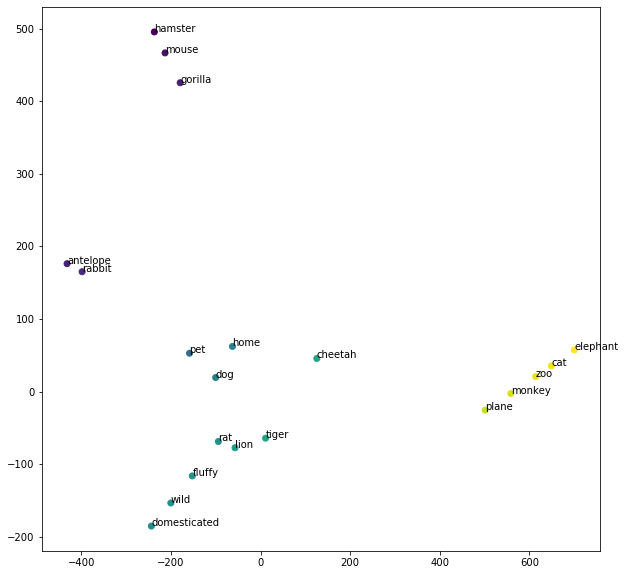

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(component_1_tsne, component_2_tsne, c=distance)

for i, txt in enumerate(animal_vecs_tsne[:, 0]):
    ax.annotate(txt, (component_1_tsne[i], component_2_tsne[i]))

### 3D

Perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significanlty different results.

In [99]:
import numpy as np
import spacy
from sklearn.manifold import TSNE

nlp = spacy.load("en")
animals = "plane dog cat hamster lion tiger elephant cheetah monkey gorilla antelope rabbit mouse rat zoo home pet fluffy wild domesticated"
animal_tokens = nlp(animals)

animal_vectors = np.vstack([word.vector for word in animal_tokens if word.has_vector])

#Run a PCA of 3 components
tsne = TSNE(n_components=3, init='random', random_state=0, perplexity=1)
animal_vecs_tsne = tsne.fit_transform(animal_vectors)

In [100]:
animal_vecs_tsne = np.c_[animals.split(), animal_vecs_tsne]

In [101]:
component_1_tsne = [float(x) for x in animal_vecs_tsne[:, 1]]
component_2_tsne = [float(x) for x in animal_vecs_tsne[:, 2]]
component_3_tsne = [float(x) for x in animal_vecs_tsne[:, 3]]
distance = [np.sqrt(np.power(float(x), 2) + np.power(float(y), 2) + np.power(float(z), 2)) for x, y, z in zip(animal_vecs_tsne[:, 1], animal_vecs_tsne[:, 2], animal_vecs_tsne[:, 3])]

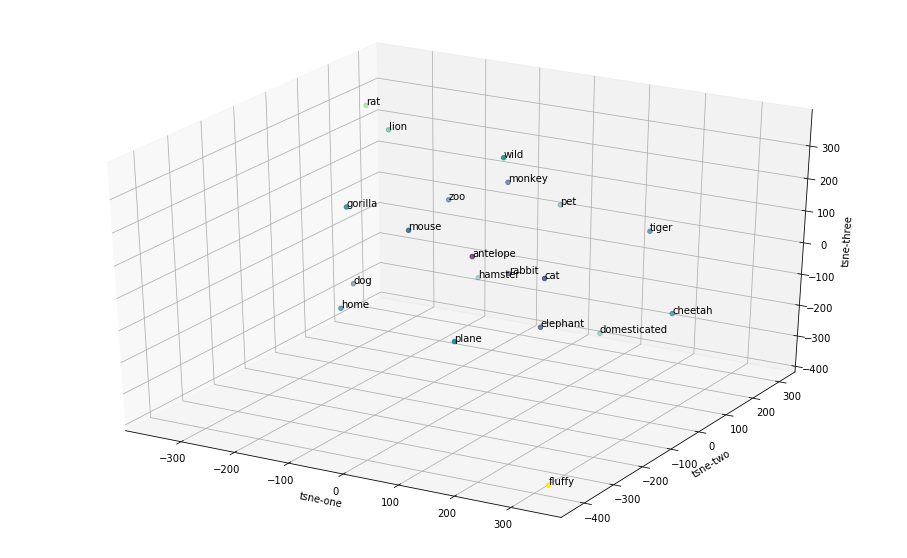

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=component_1_tsne, 
    ys=component_2_tsne, 
    zs=component_3_tsne, 
    c=distance
)

for name, x, y, z in zip(animal_vecs_tsne[:, 0], animal_vecs_tsne[:, 1], animal_vecs_tsne[:, 2], animal_vecs_tsne[:, 3]):
    ax.text(float(x), float(y), float(z), name)

ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()

In [110]:
t0 = "China has a strong economy that is growing at a rapid pace. However politically it differs greatly from the US Economy."
t1 = "At last, China seems serious about confronting an endemic problem: domestic violence and corruption."
t2 = "Japan's prime minister, Shinzo Abe, is working towards healing the economic turmoil in his own country for his view on the future of his people."
t3 = "Vladimir Putin is working hard to fix the economy in Russia as the Ruble has tumbled."
t4 = "What's the future of Abenomics? We asked Shinzo Abe for his views"
t5 = "Obama has eased sanctions on Cuba while accelerating those against the Russian Economy, even as the Ruble's value falls almost daily."
t6 = "Vladimir Putin was found to be riding a horse, again, without a shirt on while hunting deer. Vladimir Putin always seems so serious about things - even riding horses."

## Jaccard similarity: exercise example

1. Write a function `lemmatize` that receives a spaCy `Doc` and returns a list of lemmas as strings, removing stopwords, punctuation signs and whitespace
2. Write a function that receives two spaCy `Doc`s and returns a floating point number representing the Jaccard similarity (see formula below) (hint: use [`set`s](https://docs.python.org/3/library/stdtypes.html#set))
3. Compute the Jaccard similarity between `t0` and `t1`
4. Create a pandas `DataFrame` that holds the Jaccard similarity of all the text combinations from `t0` to `t6` (hint: use [`enumerate`](http://book.pythontips.com/en/latest/enumerate.html#enumerate))

$$ J(A,B) = {{|A \cap B|}\over{|A \cup B|}} $$

In [116]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp=spacy.load('en')

def lemmatize(doc):
    return [token.lemma_ for token in doc if not 
            (token.is_punct or token.is_space or token.lower_ in STOP_WORDS)]

In [117]:
lemmatize(nlp(t0))


['China',
 'strong',
 'economy',
 'grow',
 'rapid',
 'pace',
 'politically',
 'differ',
 'greatly',
 'Economy']

In [122]:
#JACCARD INDEX FUNCTION
def jaccard(doc1,doc2):
    s1=set(lemmatize(doc1))
    s2=set(lemmatize(doc2))
    return len(s1.intersection(s2))/len(s1.union(s2))

In [123]:
jaccard(nlp(t0),nlp(t1))

0.0625

In [125]:
# JaCCARD IN A DATAFRAME
import numpy as np
import pandas as pd

data=np.zeros((7,7))
docs=[nlp(text) for text in (t0,t1,t2,t3,t4,t5,t6)]

for ii,doc_a in enumerate(docs):
    for jj,doc_b in enumerate(docs):
        data[ii,jj]=jaccard(doc_a,doc_b)

pd.DataFrame(data)

,0,1,2,3,4,5,6
0,1.000000,0.0625,0.000000,0.055556,0.000000,0.050000,0.000
1,0.062500,1.0000,0.000000,0.000000,0.000000,0.000000,0.000
2,0.000000,0.0000,1.000000,0.047619,0.266667,0.000000,0.000
3,0.055556,0.0000,0.047619,1.000000,0.000000,0.052632,0.125
4,0.000000,0.0000,0.266667,0.000000,1.000000,0.000000,0.000
5,0.050000,0.0000,0.000000,0.052632,0.000000,1.000000,0.000
6,0.000000,0.0000,0.000000,0.125000,0.000000,0.000000,1.000


## TF - IDF: exercise example

In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. tf–idf is one of the most popular term-weighting schemes today; 83% of text-based recommender systems in digital libraries use tf–idf.

*Source: Wikipedia*

1. Write a function `tf` that receives a string and a spaCy `Doc` and returns the number of times the word appears in the `lemmatize`d `Doc`
2. Write a function `idf` that receives a string and a list of spaCy `Doc`s and returns the number of docs that contain the word
3. Write a function `tf_idf` that receives a string, a spaCy `Doc` and a list of spaCy `Doc`s and returns the product of `tf(t, d) · idf(t, D)`.
4. Write a function `all_lemmas` that receives a list of `Doc`s and returns a `set` of all available `lemma`s
5. Write a function `tf_idf_doc` that receives a `Doc` and a list of `Doc`s and returns a dictionary of `{lemma: TF-IDF value}`, corresponding to each the lemmas of all the available documents
6. Write a function `tf_idf_scores` that receives a list of `Doc`s and returns a `DataFrame` displaying the lemmas in the columns and the documents in the rows.
7. Visualize the TF-IDF, like this:

![alt text](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/img/tf-idf.png)

In [126]:
#step 1: function that receives a string and a spacy doc and return number of times the word appears in the lemmatized Doc

from collections import Counter

def tf(word, doc):
    counts=Counter(lemmatize(doc))
    return counts[word]

In [127]:
tf('China',nlp(t0))

1

In [133]:
#Step2: fucntion that recieves a string and a list of Spacy docs and returns the number of docs that contain the word
def idf(word,docs):
    count=0
    for doc in docs:
        if word in lemmatize(doc):
            count +=1
    return count/len(docs)

In [134]:
idf('economy',docs)

0.2857142857142857

In [135]:
#Step 3: product of both:

def tf_idf(word, doc, docs):
    return tf(word,doc)*idf(word,docs)

In [139]:
tf_idf('China',nlp(t1),docs)

0.2857142857142857

In [140]:
#Step4:all lemmas receives a list of Docs and returns a set of all available lemmas

def all_lemmas(docs):
    lemmas=set()
    for doc in docs:
        lemmas.update(lemmatize(doc))
    return lemmas

In [141]:
print(all_lemmas(docs))

{'ease', 'thing', 'turmoil', 'pace', 'fix', 'Putin', 'daily', 'fall', 'horse', 'deer', 'corruption', 'violence', 'strong', 'economic', 'hunt', 'ride', 'differ', 'future', 'ask', 'confront', 'Obama', 'prime', 'Russian', 'shirt', 'people', 'Cuba', 'sanction', 'grow', 'economy', 'heal', 'problem', 'minister', 'Economy', 'accelerate', 'find', 'politically', 'domestic', 'rapid', 'tumble', 'Russia', 'view', 'Abe', 'Shinzo', 'work', 'hard', 'ruble', 'Abenomics', 'value', 'Japan', 'endemic', 'China', 'country', 'Vladimir', 'greatly'}


In [142]:
#Step5:receives a Doc and a list of Docs and returns a dict of lemma:TF-IDF

def tf_idf_doc(doc,docs):
    lemmas=all_lemmas(docs)
    res={}
    for lemma in lemmas:
        res[lemma]=tf_idf(lemma,doc,docs)
    return res

In [144]:
print(tf_idf_doc(docs[0],docs))

{'ease': 0.0, 'thing': 0.0, 'turmoil': 0.0, 'pace': 0.14285714285714285, 'fix': 0.0, 'Putin': 0.0, 'daily': 0.0, 'fall': 0.0, 'horse': 0.0, 'deer': 0.0, 'corruption': 0.0, 'violence': 0.0, 'strong': 0.14285714285714285, 'economic': 0.0, 'hunt': 0.0, 'ride': 0.0, 'differ': 0.14285714285714285, 'future': 0.0, 'ask': 0.0, 'confront': 0.0, 'Obama': 0.0, 'prime': 0.0, 'Russian': 0.0, 'shirt': 0.0, 'people': 0.0, 'Cuba': 0.0, 'sanction': 0.0, 'grow': 0.14285714285714285, 'economy': 0.2857142857142857, 'heal': 0.0, 'problem': 0.0, 'minister': 0.0, 'Economy': 0.2857142857142857, 'accelerate': 0.0, 'find': 0.0, 'politically': 0.14285714285714285, 'domestic': 0.0, 'rapid': 0.14285714285714285, 'tumble': 0.0, 'Russia': 0.0, 'view': 0.0, 'Abe': 0.0, 'Shinzo': 0.0, 'work': 0.0, 'hard': 0.0, 'ruble': 0.0, 'Abenomics': 0.0, 'value': 0.0, 'Japan': 0.0, 'endemic': 0.0, 'China': 0.2857142857142857, 'country': 0.0, 'Vladimir': 0.0, 'greatly': 0.14285714285714285}


In [145]:
def tf_idf_scores(docs):
    lemmas=all_lemmas(docs)
    rows=[]
    for doc in docs:
        rows.append(tf_idf_doc(doc,docs))
    return pd.DataFrame(rows)

In [146]:
tb=tf_idf_scores(docs)
tb

,ease,thing,turmoil,pace,fix,Putin,daily,fall,horse,deer,...,hard,ruble,Abenomics,value,Japan,endemic,China,country,Vladimir,greatly
0,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.142857
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.285714,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.142857,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.142857,0.285714,0.000000,0.000000,0.000000,0.000000,...,0.142857,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,...,0.000000,0.285714,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.142857,0.000000,0.000000,0.000000,0.571429,0.000000,0.000000,0.285714,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.571429,0.000000


In [148]:
tb.max().max()

0.5714285714285714

In [149]:
#step 7 rescaling
tb/tb.max().max()

,ease,thing,turmoil,pace,fix,Putin,daily,fall,horse,deer,...,hard,ruble,Abenomics,value,Japan,endemic,China,country,Vladimir,greatly
0,0.00,0.00,0.00,0.25,0.00,0.0,0.00,0.00,0.0,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.5,0.00,0.0,0.25
1,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,...,0.00,0.0,0.00,0.00,0.00,0.25,0.5,0.00,0.0,0.00
2,0.00,0.00,0.25,0.00,0.00,0.0,0.00,0.00,0.0,0.00,...,0.00,0.0,0.00,0.00,0.25,0.00,0.0,0.25,0.0,0.00
3,0.00,0.00,0.00,0.00,0.25,0.5,0.00,0.00,0.0,0.00,...,0.25,0.5,0.00,0.00,0.00,0.00,0.0,0.00,0.5,0.00
4,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,...,0.00,0.0,0.25,0.00,0.00,0.00,0.0,0.00,0.0,0.00
5,0.25,0.00,0.00,0.00,0.00,0.0,0.25,0.25,0.0,0.00,...,0.00,0.5,0.00,0.25,0.00,0.00,0.0,0.00,0.0,0.00
6,0.00,0.25,0.00,0.00,0.00,1.0,0.00,0.00,0.5,0.25,...,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,1.0,0.00


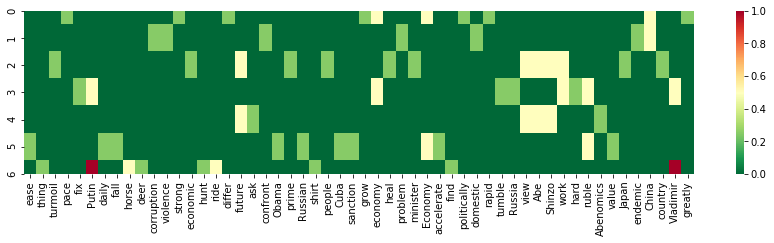

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,3))
sns.heatmap(tb/tb.max().max(),cmap='RdYlGn_r',annot=False)

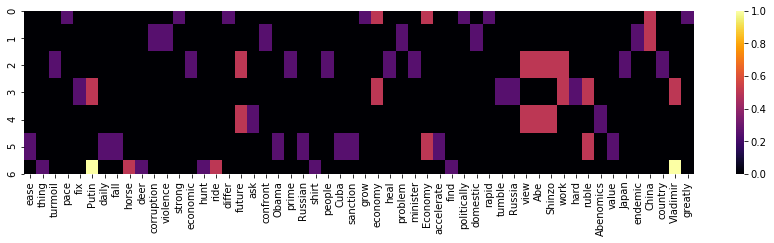

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,3))
sns.heatmap(tb/tb.max().max(),cmap='inferno',annot=False)